### Deliverable 3: Optimizing Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop additional column, 'SPECIAL_CONSIDERATIONS' and 'STATUS'.
application_df = application_df.drop(['SPECIAL_CONSIDERATIONS', 'STATUS'], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [5]:
# Determine the number of unique values in each column.
application_col = application_df.dtypes.index.tolist()
application_df[application_col].nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

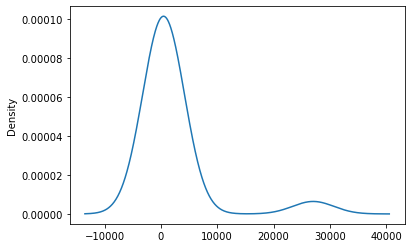

In [7]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than 100
replace_application = list(application_counts[application_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C1236        1
C2190        1
C5200        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

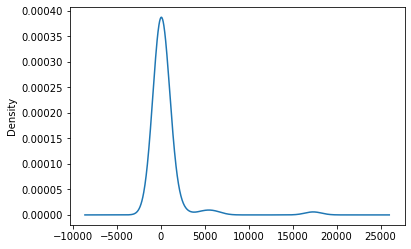

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Updated Model with Changed Dataset
"SPECIAL_CONSIDERATIONS" & "STATUS" columns removed & different binning for "APPLICATION_TYPE" & "CLASSIFICATION" columns)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3440      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 854us/step - loss: 0.5710 - accuracy: 0.7205
Epoch 2/100
804/804 [==============================] - 1s 871us/step - loss: 0.5545 - accuracy: 0.7294
Epoch 3/100
804/804 [==============================] - 1s 879us/step - loss: 0.5519 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 881us/step - loss: 0.5492 - accuracy: 0.7308
Epoch 5/100
804/804 [==============================] - 1s 883us/step - loss: 0.5491 - accuracy: 0.7295
Epoch 6/100
804/804 [==============================] - 1s 874us/step - loss: 0.5476 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 1s 882us/step - loss: 0.5467 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 1s 867us/step - loss: 0.5461 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 1s 881us/step - loss: 0.5460 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 1s 886us/step - l

804/804 [==============================] - 1s 842us/step - loss: 0.5359 - accuracy: 0.7389
Epoch 80/100
804/804 [==============================] - 1s 843us/step - loss: 0.5349 - accuracy: 0.7393
Epoch 81/100
804/804 [==============================] - 1s 842us/step - loss: 0.5354 - accuracy: 0.7393
Epoch 82/100
804/804 [==============================] - 1s 842us/step - loss: 0.5358 - accuracy: 0.7391
Epoch 83/100
804/804 [==============================] - 1s 839us/step - loss: 0.5349 - accuracy: 0.7391
Epoch 84/100
804/804 [==============================] - 1s 867us/step - loss: 0.5351 - accuracy: 0.7388
Epoch 85/100
804/804 [==============================] - 1s 890us/step - loss: 0.5354 - accuracy: 0.7390
Epoch 86/100
804/804 [==============================] - 1s 871us/step - loss: 0.5350 - accuracy: 0.7389
Epoch 87/100
804/804 [==============================] - 1s 865us/step - loss: 0.5349 - accuracy: 0.7392
Epoch 88/100
804/804 [==============================] - 1s 843us/step - loss:

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5523 - accuracy: 0.7296
Loss: 0.5522993803024292, Accuracy: 0.7295626997947693


### Updated Model with Additional Neurons & Layers

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 10,391
Trainable params: 10,391
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 964us/step - loss: 0.5655 - accuracy: 0.7235
Epoch 2/100
804/804 [==============================] - 1s 994us/step - loss: 0.5526 - accuracy: 0.7287
Epoch 3/100
804/804 [==============================] - 1s 957us/step - loss: 0.5496 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 1s 974us/step - loss: 0.5483 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 1s 985us/step - loss: 0.5471 - accuracy: 0.7323
Epoch 6/100
804/804 [==============================] - 1s 965us/step - loss: 0.5467 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 984us/step - loss: 0.5459 - accuracy: 0.7330
Epoch 8/100
804/804 [==============================] - 1s 976us/step - loss: 0.5458 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 1s 947us/step - loss: 0.5443 - accuracy: 0.7348
Epoch 10/100
804/804 [==============================] - 1s 974us/step - l

804/804 [==============================] - 1s 938us/step - loss: 0.5325 - accuracy: 0.7401
Epoch 80/100
804/804 [==============================] - 1s 940us/step - loss: 0.5328 - accuracy: 0.7397
Epoch 81/100
804/804 [==============================] - 1s 932us/step - loss: 0.5321 - accuracy: 0.7401
Epoch 82/100
804/804 [==============================] - 1s 942us/step - loss: 0.5324 - accuracy: 0.7407
Epoch 83/100
804/804 [==============================] - 1s 944us/step - loss: 0.5322 - accuracy: 0.7404
Epoch 84/100
804/804 [==============================] - 1s 938us/step - loss: 0.5326 - accuracy: 0.7396
Epoch 85/100
804/804 [==============================] - 1s 941us/step - loss: 0.5321 - accuracy: 0.7406
Epoch 86/100
804/804 [==============================] - 1s 940us/step - loss: 0.5319 - accuracy: 0.7400
Epoch 87/100
804/804 [==============================] - 1s 945us/step - loss: 0.5325 - accuracy: 0.7402
Epoch 88/100
804/804 [==============================] - 1s 978us/step - loss:

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5727 - accuracy: 0.7284
Loss: 0.572654664516449, Accuracy: 0.728396475315094


### Updated Model with Different Output Layer Activation Function

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 10,391
Trainable params: 10,391
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization/", exist_ok=True)
checkpoint_path = "checkpoints_optimization/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 32
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=int(5*STEPS_PER_EPOCH))

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size = BATCH_SIZE, steps_per_epoch=STEPS_PER_EPOCH, callbacks=[cp_callback])

Epoch 1/100
803/803 [==============================] - 1s 927us/step - loss: 0.7048 - accuracy: 0.7093
Epoch 2/100
803/803 [==============================] - 1s 951us/step - loss: 0.5722 - accuracy: 0.7244
Epoch 3/100
803/803 [==============================] - 1s 944us/step - loss: 0.5691 - accuracy: 0.7261
Epoch 4/100
803/803 [==============================] - 1s 969us/step - loss: 0.5610 - accuracy: 0.7284
Epoch 5/100
786/803 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7294
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
803/803 [==============================] - 1s 979us/step - loss: 0.5560 - accuracy: 0.7297
Epoch 6/100
803/803 [==============================] - 1s 959us/step - loss: 0.5568 - accuracy: 0.7288
Epoch 7/100
803/803 [==============================] - 1s 950us/step - loss: 0.5577 - accuracy: 0.7308
Epoch 8/100
803/803 [==============================] - 1s 962us/step - loss: 0.5540 - accuracy: 0.7291
Epoch 9/100
803/803 [

Epoch 62/100
803/803 [==============================] - 1s 932us/step - loss: 0.5365 - accuracy: 0.7375
Epoch 63/100
803/803 [==============================] - 1s 916us/step - loss: 0.5363 - accuracy: 0.7392
Epoch 64/100
803/803 [==============================] - 1s 929us/step - loss: 0.5422 - accuracy: 0.7384
Epoch 65/100
769/803 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7365
Epoch 00065: saving model to checkpoints_optimization/weights.65.hdf5
803/803 [==============================] - 1s 929us/step - loss: 0.5365 - accuracy: 0.7374
Epoch 66/100
803/803 [==============================] - 1s 940us/step - loss: 0.5360 - accuracy: 0.7382
Epoch 67/100
803/803 [==============================] - 1s 929us/step - loss: 0.5405 - accuracy: 0.7384
Epoch 68/100
803/803 [==============================] - 1s 928us/step - loss: 0.5384 - accuracy: 0.7369
Epoch 69/100
803/803 [==============================] - 1s 926us/step - loss: 0.5380 - accuracy: 0.7388
Epoch 70/100


In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6000 - accuracy: 0.7290
Loss: 0.5999736189842224, Accuracy: 0.7289795875549316


In [30]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

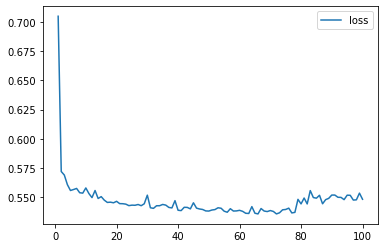

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

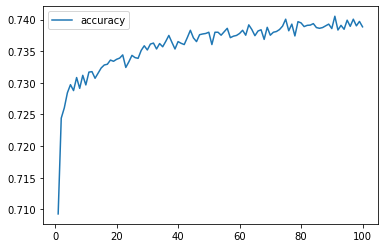

In [32]:
# Plot the accuracy
history_df.plot(y="accuracy")